In [1]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm

### Data exploration

In [2]:
data = pd.read_csv('Student Stress Factors.csv')
data.columns

Index(['Timestamp', 'Kindly Rate your Sleep Quality 😴',
       'How many times a week do you suffer headaches 🤕?',
       'How would you rate you academic performance 👩‍🎓?',
       'how would you rate your study load?',
       'How many times a week you practice extracurricular activities 🎾?',
       'How would you rate your stress levels?'],
      dtype='object')

In [3]:
data = data.drop('Timestamp', axis=1)
data

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3
5,3,1,3,2,1,1
6,3,5,1,4,3,5
7,4,3,1,4,1,1
8,2,1,4,4,5,1
9,1,2,3,2,5,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   Kindly Rate your Sleep Quality 😴                                  53 non-null     int64
 1   How many times a week do you suffer headaches 🤕?                  53 non-null     int64
 2   How would you rate you academic performance 👩‍🎓?                  53 non-null     int64
 3   how would you rate your study load?                               53 non-null     int64
 4   How many times a week you practice extracurricular activities 🎾?  53 non-null     int64
 5   How would you rate your stress levels?                            53 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [5]:
data.describe()

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,3.150943,1.981132,3.226415,2.811321,2.886792,2.792453
std,1.199298,1.263246,1.154281,1.428509,1.449939,1.377826
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000
50%,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000
75%,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Data cleaning

In [6]:
data.isnull().sum()

Kindly Rate your Sleep Quality 😴                                    0
How many times a week do you suffer headaches 🤕?                    0
How would you rate you academic performance 👩‍🎓?                    0
how would you rate your study load?                                 0
How many times a week you practice extracurricular activities 🎾?    0
How would you rate your stress levels?                              0
dtype: int64

In [7]:
## check for duplicated rows
data.duplicated().sum()

0

# Data exploration analysis

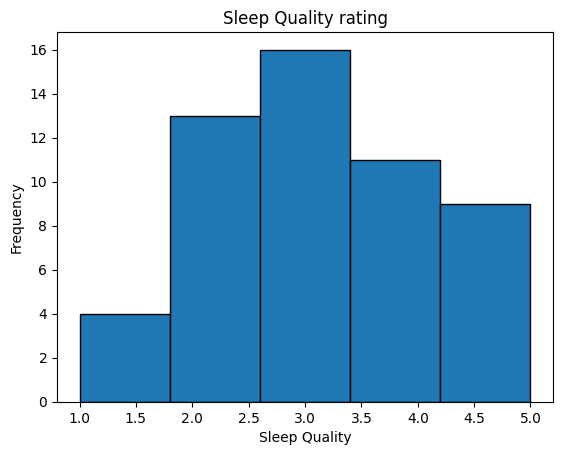

In [8]:
plt.hist(data['Kindly Rate your Sleep Quality 😴'], bins = 5, edgecolor = 'black')
plt.title("Sleep Quality rating")
plt.xlabel("Sleep Quality")
plt.ylabel("Frequency")
plt.show()

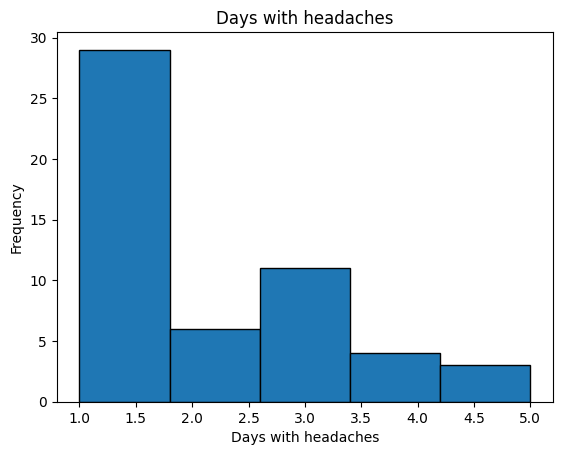

In [9]:
plt.hist(data['How many times a week do you suffer headaches 🤕?'], bins = 5, edgecolor = 'black')
plt.title("Days with headaches")
plt.xlabel("Days with headaches")
plt.ylabel("Frequency")
plt.show()

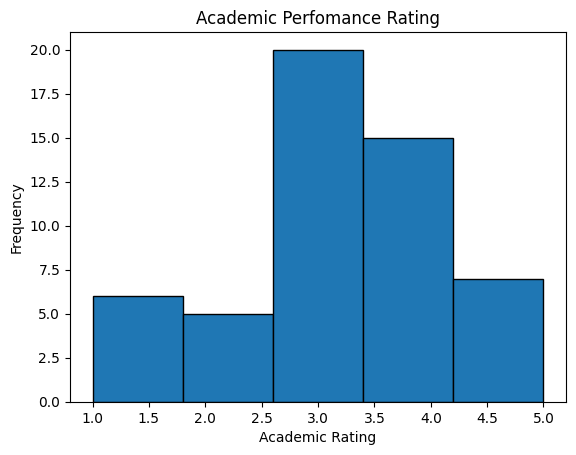

In [10]:
plt.hist(data['How would you rate you academic performance 👩‍🎓?'], bins = 5, edgecolor = 'black')
plt.title("Academic Perfomance Rating")
plt.xlabel("Academic Rating")
plt.ylabel("Frequency")
plt.show()

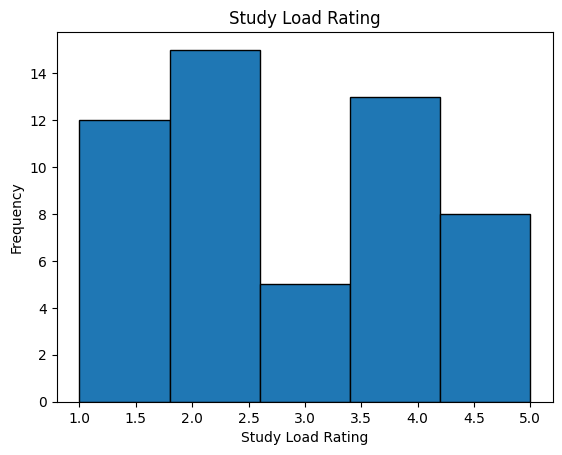

In [11]:
plt.hist(data['how would you rate your study load?'], bins = 5, edgecolor = 'black')
plt.title("Study Load Rating")
plt.xlabel("Study Load Rating")
plt.ylabel("Frequency")
plt.show()

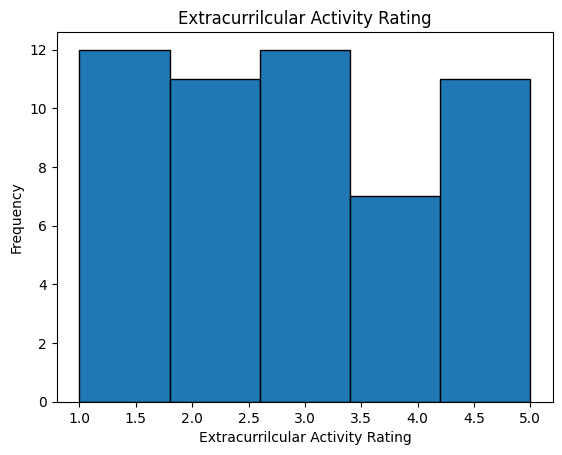

In [12]:
plt.hist(data['How many times a week you practice extracurricular activities 🎾?'], bins = 5, edgecolor = 'black')
plt.title("Extracurrilcular Activity Rating")
plt.xlabel("Extracurrilcular Activity Rating")
plt.ylabel("Frequency")
plt.show()

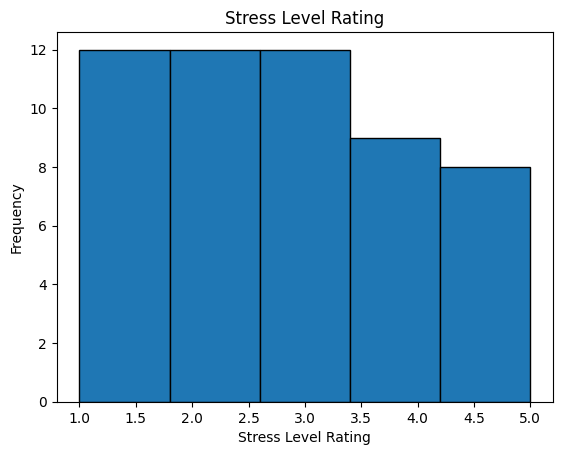

In [13]:
plt.hist(data['How would you rate your stress levels?'], bins = 5, edgecolor = 'black')
plt.title("Stress Level Rating")
plt.xlabel("Stress Level Rating")
plt.ylabel("Frequency")
plt.show()

### Correlation analysis

In [14]:
correlation = data[['Kindly Rate your Sleep Quality 😴',
       'How many times a week do you suffer headaches 🤕?',
       'how would you rate your study load?',
        'How would you rate you academic performance 👩‍🎓?',          
       'How many times a week you practice extracurricular activities 🎾?',
       'How would you rate your stress levels?']].corr()
correlation

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,how would you rate your study load?,How would you rate you academic performance 👩‍🎓?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
Kindly Rate your Sleep Quality 😴,1.000000,0.027303,0.095518,0.266565,-0.001043,0.286995
How many times a week do you suffer headaches 🤕?,0.027303,1.000000,0.104557,-0.115711,-0.179676,-0.035439
how would you rate your study load?,0.095518,0.104557,1.000000,0.073057,0.054481,0.341232
How would you rate you academic performance 👩‍🎓?,0.266565,-0.115711,0.073057,1.000000,0.050081,0.005932
How many times a week you practice extracurricular activities 🎾?,-0.001043,-0.179676,0.054481,0.050081,1.000000,0.180536
How would you rate your stress levels?,0.286995,-0.035439,0.341232,0.005932,0.180536,1.000000


## Linear Regression Analysis

In [15]:
x = data[['Kindly Rate your Sleep Quality 😴',
       'How many times a week do you suffer headaches 🤕?',
       'how would you rate your study load?',
       'How many times a week you practice extracurricular activities 🎾?',
       'How would you rate your stress levels?']].to_numpy()
y = data['How would you rate you academic performance 👩‍🎓?'].to_numpy().reshape(-1,1)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 10)

In [17]:
model= LinearRegression()

In [18]:
model.fit(x_train, y_train)

LinearRegression()

In [19]:
# linear regression coefficients - to check how much each question
# impacted academic performance

linear_coefficient = model.coef_
linear_coefficient

array([[ 0.19577561, -0.11549465,  0.02763273, -0.0420948 , -0.10584436]])

In [20]:
performance_prediction = model.predict(x).astype(int)

In [21]:
coeff_det = r2_score(y, performance_prediction)
coeff_det

-0.19798474945533795

In [22]:
# this suggests that the model is not performing well on the data, so 
# we're adding an ordinary least square model(OLS)

In [23]:
X = data[['Kindly Rate your Sleep Quality 😴',
       'How many times a week do you suffer headaches 🤕?',
       'how would you rate your study load?',
       'How many times a week you practice extracurricular activities 🎾?',
       'How would you rate your stress levels?']]

X = sm.add_constant(X)

model = sm.OLS(y,X)


In [24]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.078
Date:                Sun, 24 Dec 2023   Prob (F-statistic):              0.385
Time:                        20:41:33   Log-Likelihood:                -79.425
No. Observations:                  53   AIC:                             170.9
Df Residuals:                      47   BIC:                             182.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                2.5306      0.671      3.770      0.000       1.180       3.881
Kindly Rate your Sleep Quality 😴                                     0.2856      0.139      2.054      0.046       0.006       0.565
How many times a week do you suffer headaches 🤕?                    -0.1194      0.129     -0.923      0.361      -0.380       0.141
how would you rate your study load?                                  0.0798      0.120      0.667      0.508      -0.161       0.321
How many times a week you practice extracurricular activities 🎾?     0.0352      0.114      0.309      0.758      -0.194       0.264
How would you rate your stress levels?                              -0.1052      0.130     -0.807      0.423      -0.367       0.157
==============================================================================
Omnibus:                        0.873   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.828
Skew:                          -0.287   Prob(JB):                        0.661
Kurtosis:                       2.788   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Save the trained model


import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)